In [2]:
%matplotlib notebook
import GPy
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import ipywidgets as widgets
from IPython.display import display

In [3]:
ls1_slider = widgets.FloatSlider(value = 1.0, min = 0, max = 3, step = 0.05, description = "Length Scale 1")
ls2_slider = widgets.FloatSlider(value = 1.0, min = 0, max = 3, step = 0.05, description = "Length Scale 2")
k3_checkbox = widgets.Checkbox(value = True, description = "Kernel 3?")
recompute_button = widgets.Button(description = "Resample")
recompute_button.on_click(lambda x: plot_sample(build_kernel()))
    
def build_kernel():
    k1 = GPy.kern.Linear(input_dim = 1, active_dims = [0])
    k2 = GPy.kern.ExpQuad(input_dim = 1, lengthscale = ls1_slider.value, active_dims = [1])
    k3 = GPy.kern.ExpQuad(input_dim = 1, lengthscale = ls2_slider.value, active_dims = [0])
    if k3_checkbox.value is True:
        k = k1 * k2 * k3
    else:
        k = k1 * k2 * k3
    return k

FloatSlider(value=1.0, description=u'Length Scale 1', max=3.0, step=0.05)

FloatSlider(value=1.0, description=u'Length Scale 2', max=3.0, step=0.05)

Checkbox(value=True, description=u'Kernel 3?')

Button(description=u'Resample', style=ButtonStyle())

<IPython.core.display.Javascript object>


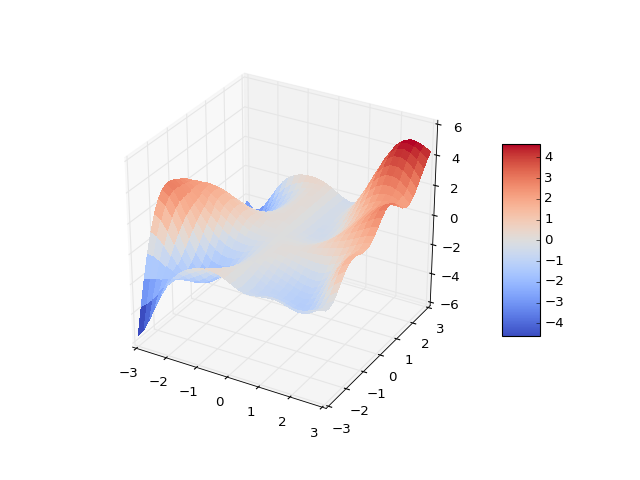

 /Users/johncoglianese/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning:covariance is not positive-semidefinite.


In [4]:
display(ls1_slider, ls2_slider, k3_checkbox, recompute_button)

fig = plt.figure()
ax = fig.gca(projection = '3d')
cb = {}

def plot_sample(k):
    ax.clear()
    if len(cb) is not 0:
        cb['cb'].remove()
    xx, yy = np.mgrid[-3:3:30j, -3:3:30j]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
    #plt.contourf(xx, yy, s.reshape(*xx.shape), cmap=plt.cm.hot)
    #plt.imshow(s.reshape(*xx.shape), interpolation='nearest')
    #plt.colorbar()
    surf = ax.plot_surface(xx, yy, s.reshape(*xx.shape), cmap = cm.coolwarm, 
                          linewidth = 0, antialiased = False, rstride = 1, cstride = 1)
    cb['cb'] = fig.colorbar(surf, shrink = 0.5, aspect = 5)

plot_sample(build_kernel())

In [9]:
from mayavi import mlab
k = build_kernel()
xx2, yy2 = np.mgrid[-3:3:30j, -3:3:30j]
X2 = np.vstack((xx2.flatten(), yy2.flatten())).T
K2 = k.K(X2)
s2 = np.random.multivariate_normal(np.zeros(X2.shape[0]), K2)
fig = mlab.figure(1, size = (1000,800))
mlab.clf(fig)
m = mlab.surf(xx2, yy2, s2.reshape(*xx2.shape), colormap = 'blue-red', 
             line_width = 0, figure = fig)
extent = (-3, 3, -3, 3, -10, 10)
out = mlab.outline(m, color = (.7, .7, .7), extent = extent)
ax = mlab.axes(m, color = (.7, .7, .7), figure = fig, xlabel = "X", ylabel = "Y", zlabel = "Z",
              extent = extent)
mlab.show()

 /Users/johncoglianese/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning:covariance is not positive-semidefinite.


In [8]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

k = build_kernel()
xx2, yy2 = np.mgrid[-3:3:30j, -3:3:30j]
X2 = np.vstack((xx2.flatten(), yy2.flatten())).T
K2 = k.K(X2)
s2 = np.random.multivariate_normal(np.zeros(X2.shape[0]), K2)

data = [go.Surface(x = xx2, y = yy2, z = s2.reshape(*xx2.shape))]
layout = go.Layout(
    title='Test',
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='test-3d-surface')

 /Users/johncoglianese/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning:covariance is not positive-semidefinite.
